### Student details

Student name: Hoang Tu BUI 

Student ID: 24005665

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [1]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [2]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data 
(provided - should be completed in previous E-tivity)

In [3]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_sex.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

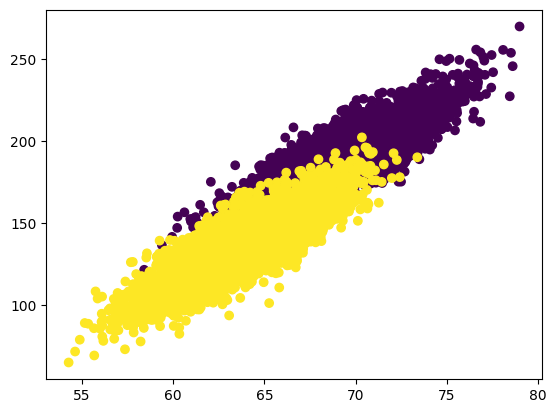

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);

### Train/Test Split 
(provided - should be completed in previous E-tivity)

In [5]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

### Train the algorithm (Task)

In [10]:
perceptron = Perceptron()

perceptron.train(X_train, y_train)

### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [11]:
from sklearn.metrics import accuracy_score

y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8545454545454545

### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable

Text(0, 0.5, 'Errors')

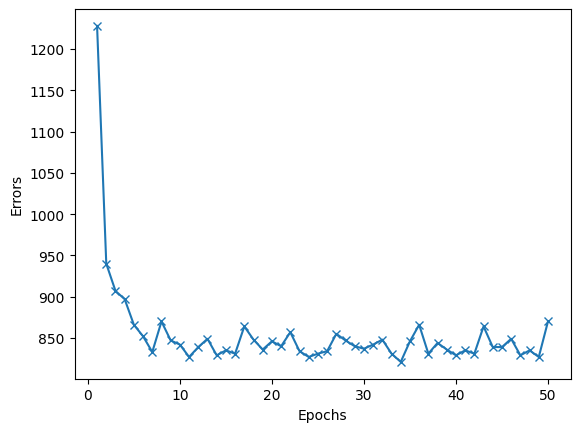

In [16]:
plt.plot(range(1, len(perceptron.errors_)+1), perceptron.errors_, marker='x')
plt.xlabel('Epochs')
plt.ylabel('Errors')

2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

In [25]:
# finding range of values and generating 5000 samples between the range
X0 = [x[0] for x in X]
X0Min = min(X0)
X0Max = max(X0)
X0Sample5000 = np.random.uniform(X0Min, X0Max, 5000)

X1 = [x[1] for x in X]
X1Min = min(X1)
X1Max = max(X1)
X1Sample5000 = np.random.uniform(X1Min, X1Max, 5000)

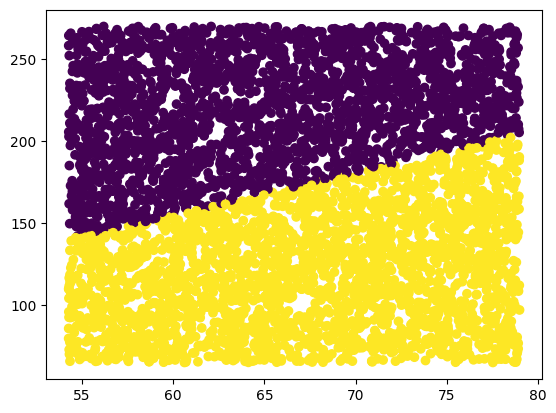

In [26]:
# predict the values for the 5000 samples to find the decision boundary
y5000_pred = perceptron.predict(np.array([X0Sample5000, X1Sample5000]).T)

plt.scatter(X0Sample5000, X1Sample5000, c=y5000_pred)

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses? 
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
3.	Why can’t we get zero error with this data?


1. As the training progresses, the errors reduce drammatically in the first epochs then there is no improvements after 850 errors. The number of errors fluctuate around that point
2. The best solution is not in the last epoch. It is at around epoch 25. This happended because of overfitting. The model not only learns the pattern of the data but also the noise. 
3. The data have a significant overlap region, it becomes difficult for any model to draw a clear decision boundary that perfectly separates the classes as there’s no clear distinction between the two classes in that region.

### Create a copy of the Perceptron class, and rename it to something reasonable, like PerceptronEE. Implement an early exit, to exit the training once convergence has been achieved, i.e. once the error is at an acceptable level.

In [ ]:
class PerceptronEE:
    def __init__(self, eta=0.01, epochs=50, acceptable_error=900):
        self.eta = eta
        self.epochs = epochs
        # stop training if the error is below this value
        self.acceptable_error = acceptable_error  

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            
            # stop training when the error is below the acceptable error
            if errors <= self.acceptable_error:
                break
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)